In [18]:
import yfinance as yf

# Download 5 years of TQQQ data
tqqq = yf.download("TQQQ", period="5y")

# Use adjusted close (recommended) or regular close
average_price = tqqq['Close'].mean()
print(f"Average adjusted close price (TQQQ, last 5 years): ${average_price}")


[*********************100%***********************]  1 of 1 completed

Average adjusted close price (TQQQ, last 5 years): $Ticker
TQQQ    48.07652
dtype: float64


[*********************100%***********************]  1 of 1 completed
C:\Users\shixiangheng\AppData\Local\Temp\ipykernel_76136\1635839675.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  percent_return = float(end_price / start_price - 1)  # Ensure it's a float


Average 1-year return (TQQQ, last 5 years): 60.40%


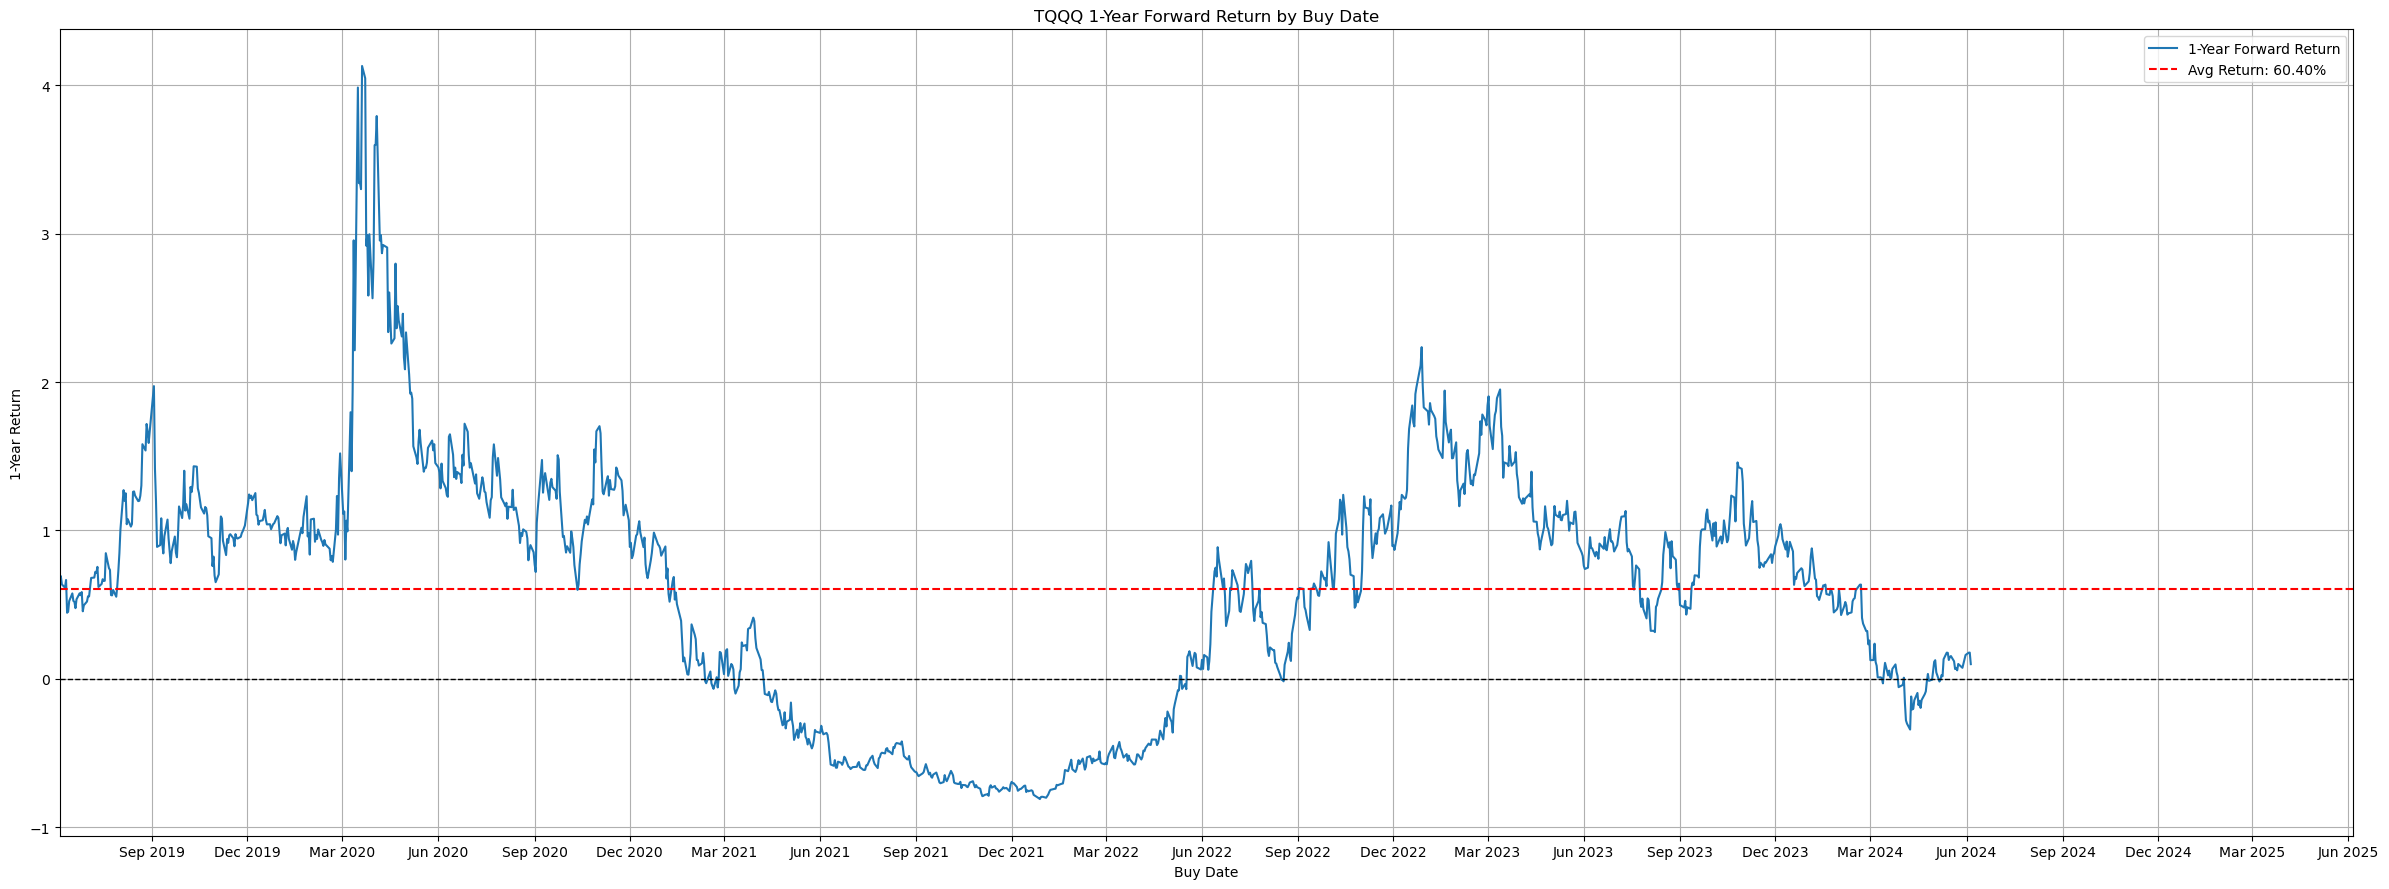

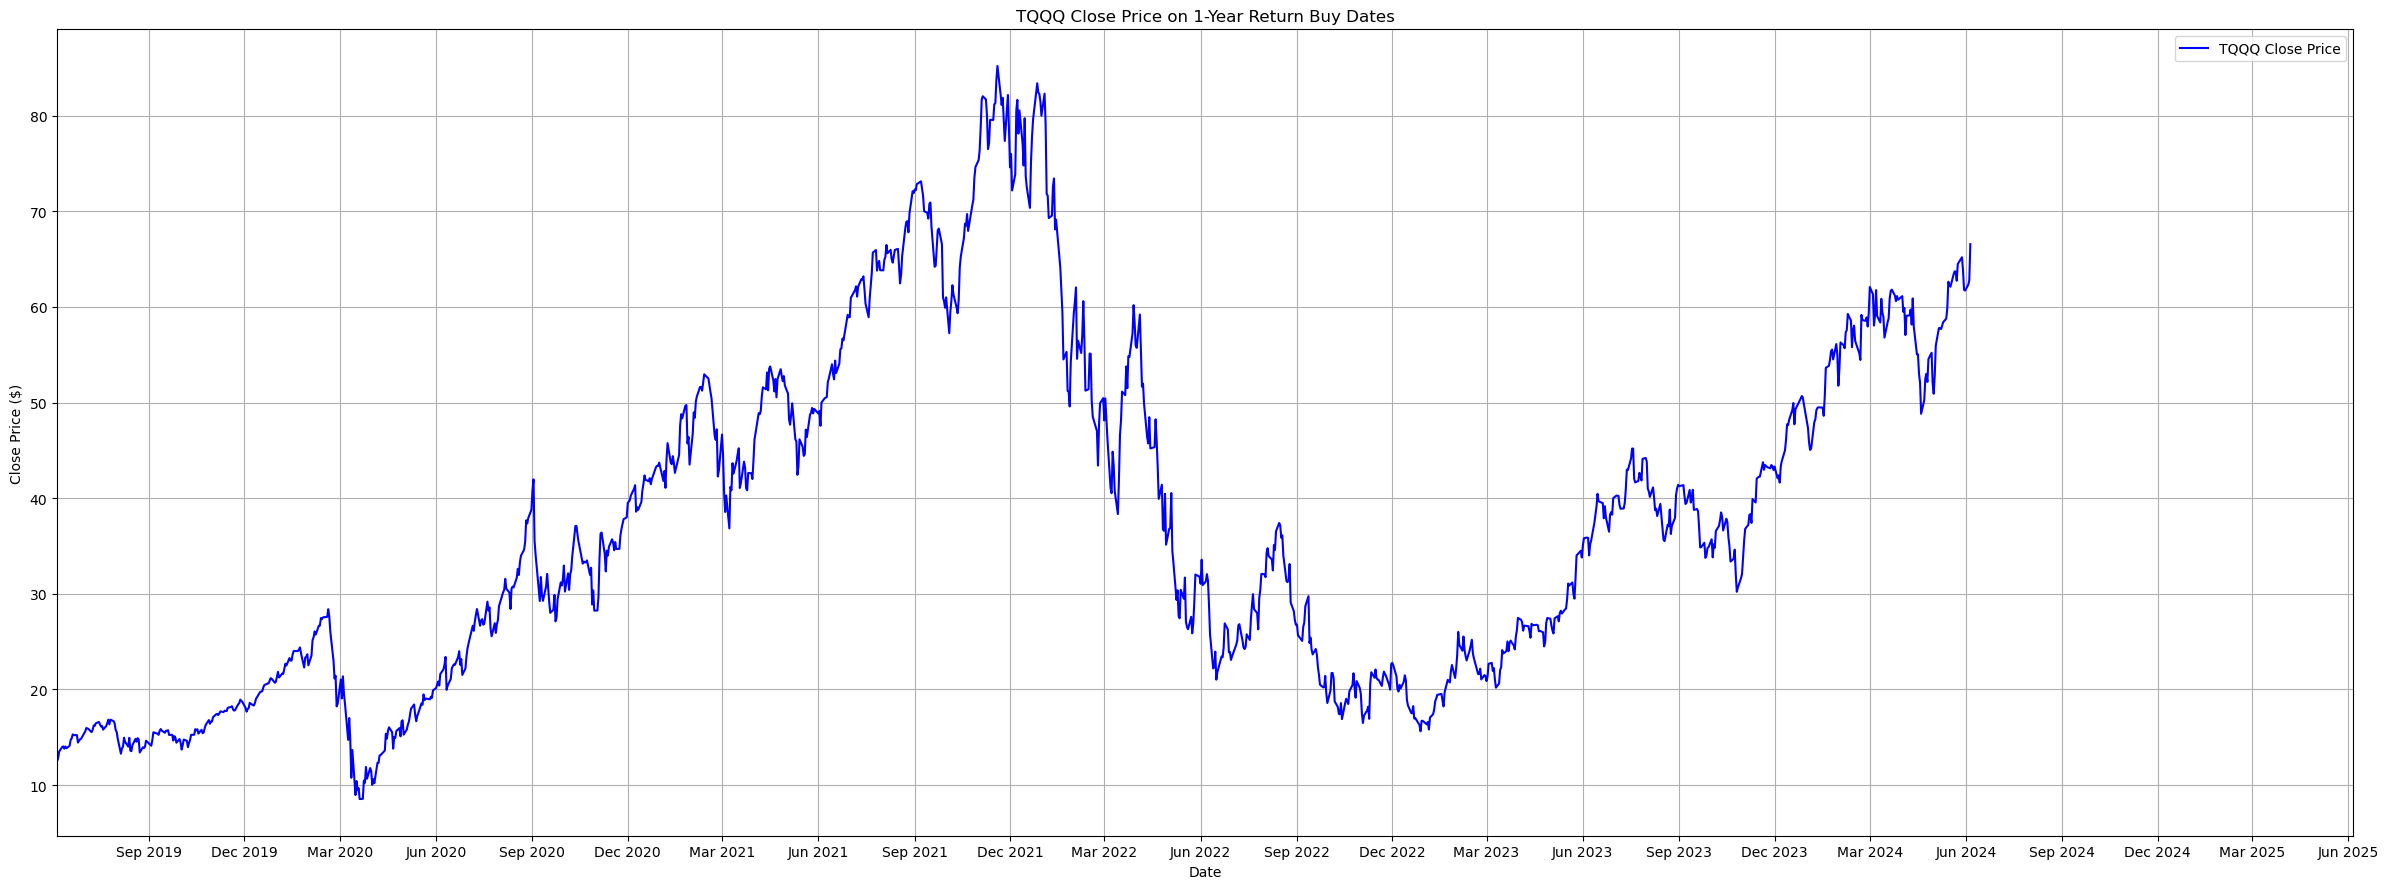

In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
# Download 6 years to ensure full 1-year windows
tqqq = yf.download("TQQQ", period="6y")['Close'].dropna()

# Store 1-year forward returns and corresponding buy dates
returns = []
dates = []

for i in range(len(tqqq)):
    buy_date = tqqq.index[i]
    sell_date = buy_date + timedelta(days=365)

    # Find the closest trading day after 1 year
    future_prices = tqqq[tqqq.index >= sell_date]
    if future_prices.empty:
        continue  # skip if no future price
    actual_sell_date = future_prices.index[0]

    start_price = tqqq.loc[buy_date]
    end_price = tqqq.loc[actual_sell_date]
    percent_return = float(end_price / start_price - 1)  # Ensure it's a float
    returns.append(percent_return)
    dates.append(buy_date)

# Convert to a pandas Series and drop NaNs (just in case)
returns_series = pd.Series(returns, index=pd.to_datetime(dates)).dropna()

# Check if it's empty (avoid plotting error)
if returns_series.empty:
    print("No valid 1-year return data to plot.")
else:
    # Average 1-year return
    average_1yr_return = returns_series.mean()
    print(f"Average 1-year return (TQQQ, last 5 years): {average_1yr_return:.2%}")
    # Plot
    plt.figure(figsize=(24, 9))
    plt.plot(returns_series.index, returns_series.values, label="1-Year Forward Return")
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axhline(average_1yr_return, color='red', linestyle='--', label=f'Avg Return: {average_1yr_return:.2%}')
    plt.title("TQQQ 1-Year Forward Return by Buy Date")
    plt.xlabel("Buy Date")
    plt.ylabel("1-Year Return")
    plt.legend()
    plt.grid(True)

    # Format x-axis to show months
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # every 3 months
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # e.g., Jan 2023

    # Extend x-axis to current date
    plt.xlim(returns_series.index.min(), pd.Timestamp.today())

    plt.tight_layout()
    plt.show()
# Subset the original TQQQ close series to match the return calculation dates
price_on_buy_dates = tqqq.loc[returns_series.index]

# Plot closing prices
plt.figure(figsize=(24, 9))
plt.plot(price_on_buy_dates.index, price_on_buy_dates.values, label="TQQQ Close Price", color='blue')
plt.title("TQQQ Close Price on 1-Year Return Buy Dates")
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.grid(True)
plt.legend()

# Format x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Extend x-axis to current date
plt.xlim(price_on_buy_dates.index.min(), pd.Timestamp.today())

plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed

Percentage of closing prices within ±2 standard deviations: 81.19%
Most recent day's std: 10.05
Most recent day's Upper Band: 80.46
Most recent day's Lower Band: 40.26
Most recent day's Upper 1 std Band: 70.41
Most recent day's Lower 1 std Band: 50.31
Most recent day's short SMA: 60.36
Dates:  2025-06-05 00:00:00
Today's price: 73.15


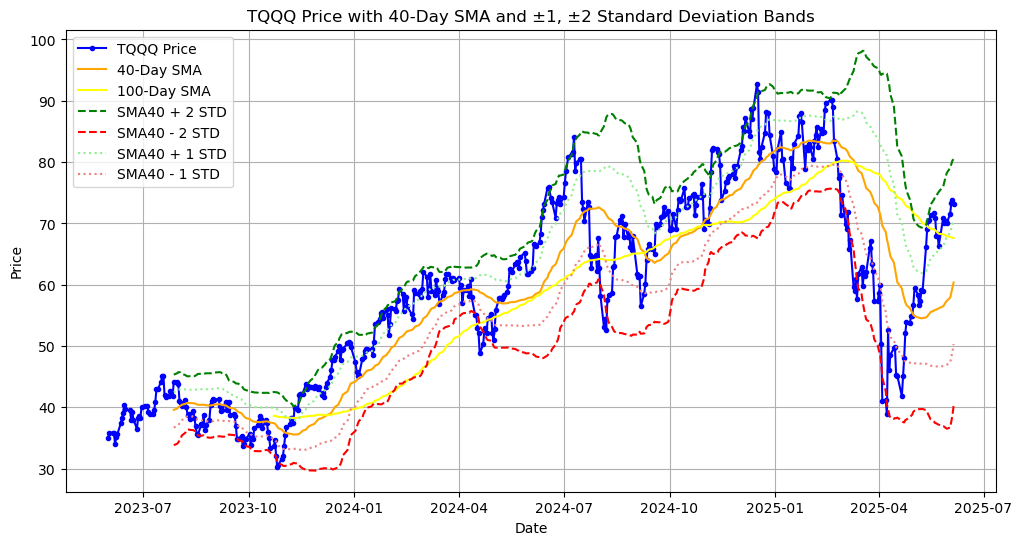

In [20]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Fetch TQQQ data
symbol = "TQQQ"
# User-defined date range
start_date = "2023-06-01"  # Change as needed
end_date = "2025-12-31"    # Change as needed

# Fetch TQQQ data
symbol = "TQQQ"
data = yf.download(symbol, start=start_date, end=end_date, interval="1d")
data = data.reset_index().droplevel(1, axis=1)
window_num = 40
window_long = 100
# Calculate window_num-day simple moving average (SMAwindow_num)
data[f"SMA{window_num}"] = data["Close"].rolling(window=window_num).mean()
data[f"SMA{window_long}"] = data["Close"].rolling(window=window_long).mean()
# Calculate rolling standard deviation
std_dev = data["Close"].rolling(window=window_num).std()

# Upper and lower bands (SMAwindow_num ± 2 * standard deviation)
data["Upper Band"] = data[f"SMA{window_num}"] + 2 * std_dev
data["Lower Band"] = data[f"SMA{window_num}"] - 2 * std_dev

# Upper and lower bands (SMAwindow_num ± 1 * standard deviation)
data["Upper Band 1"] = data[f"SMA{window_num}"] + 1 * std_dev
data["Lower Band 1"] = data[f"SMA{window_num}"] - 1 * std_dev

# Calculate probability of normal distribution within ±2 standard deviations
within_2_std = ((data["Close"] >= data["Lower Band"]) & (data["Close"] <= data["Upper Band"]))
probability_within_2_std = within_2_std.mean() * 100

# Get the most recent day's upper and lower band values
latest_std = list(std_dev)[-1]
latest_upper_band = data["Upper Band"].iloc[-1]
latest_lower_band = data["Lower Band"].iloc[-1]


latest_sma1 = data[f"SMA{window_num}"].iloc[-1]
latest_price = data['Close'].iloc[-1]
today_date = data['Date'].iloc[-1]
print(f"Percentage of closing prices within ±2 standard deviations: {probability_within_2_std:.2f}%")
print(f"Most recent day's std: {latest_std:.2f}")
print(f"Most recent day's Upper Band: {latest_upper_band:.2f}")
print(f"Most recent day's Lower Band: {latest_lower_band:.2f}")

latest_upper_band = data["Upper Band 1"].iloc[-1]
latest_lower_band = data["Lower Band 1"].iloc[-1]



print(f"Most recent day's Upper 1 std Band: {latest_upper_band:.2f}")
print(f"Most recent day's Lower 1 std Band: {latest_lower_band:.2f}")
print(f"Most recent day's short SMA: {latest_sma1:.2f}")
print('Dates: ',today_date)
print(f"Today's price: {latest_price:.2f}")



# Plot the results
data.index = data['Date']
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Close"], label="TQQQ Price", color="blue", marker='.')
plt.plot(data.index, data[f"SMA{window_num}"], label=f"{window_num}-Day SMA", color="orange")
plt.plot(data.index, data[f"SMA{window_long}"], label=f"{window_long}-Day SMA", color="yellow")

plt.plot(data.index, data["Upper Band"], label=f"SMA{window_num} + 2 STD", linestyle="dashed", color="green")
plt.plot(data.index, data["Lower Band"], label=f"SMA{window_num} - 2 STD", linestyle="dashed", color="red")
plt.plot(data.index, data["Upper Band 1"], label=f"SMA{window_num} + 1 STD", linestyle="dotted", color="lightgreen")
plt.plot(data.index, data["Lower Band 1"], label=f"SMA{window_num} - 1 STD", linestyle="dotted", color="lightcoral")

plt.title(f"TQQQ Price with {window_num}-Day SMA and ±1, ±2 Standard Deviation Bands")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

In [21]:
tqqq_data = data.copy()
tqqq_data['diff'] =  tqqq_data["Close"] - tqqq_data["Lower Band"]
#max_diff = data['diff'].dropna().max()
min_diff = tqqq_data['diff'].dropna().min()
print(min_diff)
print('min_price_possible: ')
print(tqqq_data["Lower Band"].iloc[-1]+min_diff)

-6.189985903336407
min_price_possible: 
34.0701712797292


In [22]:
temp_tqqq= tqqq_data[tqqq_data['diff']<0]
temp_tqqq['diff'].mean()

-2.1214933454422495

[*********************100%***********************]  1 of 1 completed

Percentage of closing prices within ±2 standard deviations: 82.18%
Most recent day's std: 29.68
Most recent day's Upper Band: 549.62
Most recent day's Lower Band: 430.89
Most recent day's Upper 1 std Band: 519.94
Most recent day's Lower 1 std Band: 460.57
Most recent day's short SMA: 490.25
Dates:  2025-06-05 00:00:00
Today's price: 527.08


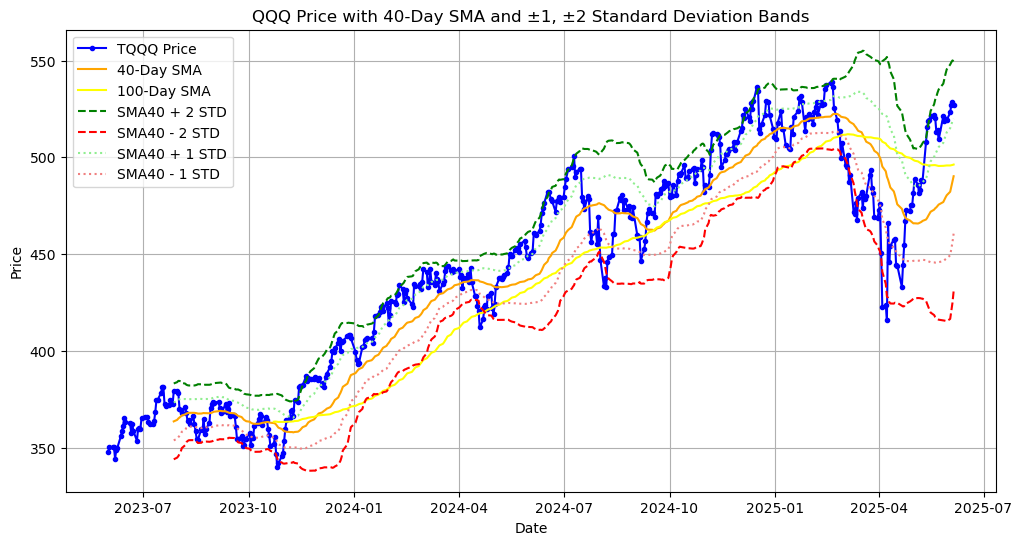

In [23]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# User-defined date range
start_date = "2023-06-01"  # Change as needed
end_date = "2025-12-31"    # Change as needed

# Fetch TQQQ data
symbol = "QQQ"
data = yf.download(symbol, start=start_date, end=end_date, interval="1d")
data = data.reset_index().droplevel(1, axis=1)
window_num = 40
window_long = 100
# Calculate window_num-day simple moving average (SMAwindow_num)
data[f"SMA{window_num}"] = data["Close"].rolling(window=window_num).mean()
data[f"SMA{window_long}"] = data["Close"].rolling(window=window_long).mean()
# Calculate rolling standard deviation
std_dev = data["Close"].rolling(window=window_num).std()

# Upper and lower bands (SMAwindow_num ± 2 * standard deviation)
data["Upper Band"] = data[f"SMA{window_num}"] + 2 * std_dev
data["Lower Band"] = data[f"SMA{window_num}"] - 2 * std_dev

# Upper and lower bands (SMAwindow_num ± 1 * standard deviation)
data["Upper Band 1"] = data[f"SMA{window_num}"] + 1 * std_dev
data["Lower Band 1"] = data[f"SMA{window_num}"] - 1 * std_dev

# Calculate probability of normal distribution within ±2 standard deviations
within_2_std = ((data["Close"] >= data["Lower Band"]) & (data["Close"] <= data["Upper Band"]))
probability_within_2_std = within_2_std.mean() * 100

# Get the most recent day's upper and lower band values
latest_std = list(std_dev)[-1]
latest_upper_band = data["Upper Band"].iloc[-1]
latest_lower_band = data["Lower Band"].iloc[-1]


latest_sma1 = data[f"SMA{window_num}"].iloc[-1]
latest_price = data['Close'].iloc[-1]
today_date = data['Date'].iloc[-1]
print(f"Percentage of closing prices within ±2 standard deviations: {probability_within_2_std:.2f}%")
print(f"Most recent day's std: {latest_std:.2f}")
print(f"Most recent day's Upper Band: {latest_upper_band:.2f}")
print(f"Most recent day's Lower Band: {latest_lower_band:.2f}")

latest_upper_band = data["Upper Band 1"].iloc[-1]
latest_lower_band = data["Lower Band 1"].iloc[-1]



print(f"Most recent day's Upper 1 std Band: {latest_upper_band:.2f}")
print(f"Most recent day's Lower 1 std Band: {latest_lower_band:.2f}")
print(f"Most recent day's short SMA: {latest_sma1:.2f}")
print('Dates: ',today_date)
print(f"Today's price: {latest_price:.2f}")


# Plot the results
data.index = data['Date']
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Close"], label="TQQQ Price", color="blue", marker='.')
plt.plot(data.index, data[f"SMA{window_num}"], label=f"{window_num}-Day SMA", color="orange")
plt.plot(data.index, data[f"SMA{window_long}"], label=f"{window_long}-Day SMA", color="yellow")

plt.plot(data.index, data["Upper Band"], label=f"SMA{window_num} + 2 STD", linestyle="dashed", color="green")
plt.plot(data.index, data["Lower Band"], label=f"SMA{window_num} - 2 STD", linestyle="dashed", color="red")
plt.plot(data.index, data["Upper Band 1"], label=f"SMA{window_num} + 1 STD", linestyle="dotted", color="lightgreen")
plt.plot(data.index, data["Lower Band 1"], label=f"SMA{window_num} - 1 STD", linestyle="dotted", color="lightcoral")

plt.title(f"{symbol} Price with {window_num}-Day SMA and ±1, ±2 Standard Deviation Bands")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

In [24]:
data['diff'] =  data["Close"] - data["Lower Band"]
#max_diff = data['diff'].dropna().max()
min_diff = data['diff'].dropna().min()
print(min_diff)
print('min_price_possible: ')
print(data["Lower Band"].iloc[-1]+min_diff)

-18.209633089987335
min_price_possible: 
412.678784505696


[*********************100%***********************]  1 of 1 completed

Percentage of closing prices within ±2 standard deviations: 85.95%
Most recent day's std: 8.67
Most recent day's Upper Band: 377.00
Most recent day's Lower Band: 342.33
Most recent day's Upper 1 std Band: 368.33
Most recent day's Lower 1 std Band: 351.00
Most recent day's short SMA: 359.67
Dates:  2023-10-30 00:00:00
Today's price: 345.75


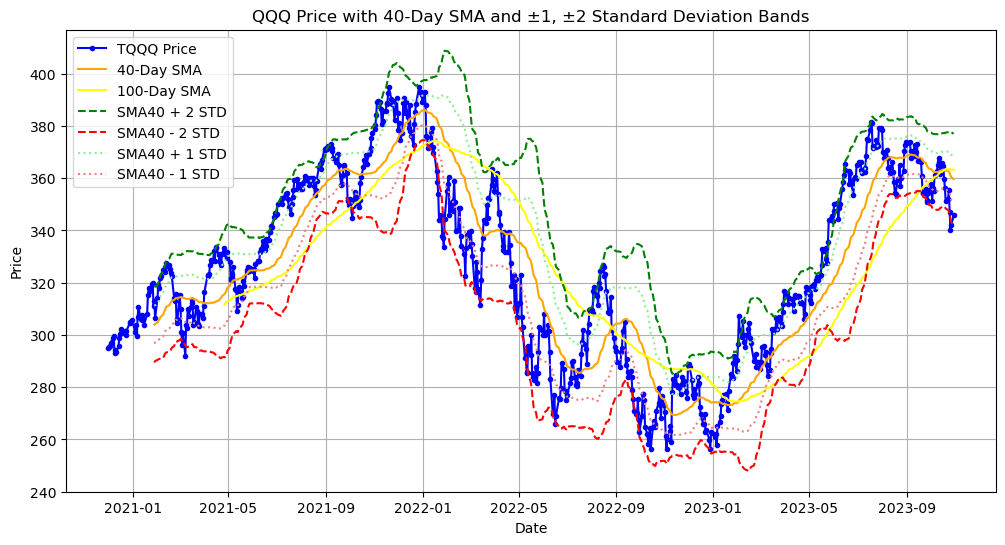

In [25]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# User-defined date range
start_date = "2020-12-01"  # Change as needed
end_date = "2023-10-31"    # Change as needed

# Fetch TQQQ data
symbol = "QQQ"
data = yf.download(symbol, start=start_date, end=end_date, interval="1d")
data = data.reset_index().droplevel(1, axis=1)
window_num = 40
window_long = 100
# Calculate window_num-day simple moving average (SMAwindow_num)
data[f"SMA{window_num}"] = data["Close"].rolling(window=window_num).mean()
data[f"SMA{window_long}"] = data["Close"].rolling(window=window_long).mean()
# Calculate rolling standard deviation
std_dev = data["Close"].rolling(window=window_num).std()

# Upper and lower bands (SMAwindow_num ± 2 * standard deviation)
data["Upper Band"] = data[f"SMA{window_num}"] + 2 * std_dev
data["Lower Band"] = data[f"SMA{window_num}"] - 2 * std_dev

# Upper and lower bands (SMAwindow_num ± 1 * standard deviation)
data["Upper Band 1"] = data[f"SMA{window_num}"] + 1 * std_dev
data["Lower Band 1"] = data[f"SMA{window_num}"] - 1 * std_dev

# Calculate probability of normal distribution within ±2 standard deviations
within_2_std = ((data["Close"] >= data["Lower Band"]) & (data["Close"] <= data["Upper Band"]))
probability_within_2_std = within_2_std.mean() * 100

# Get the most recent day's upper and lower band values
latest_std = list(std_dev)[-1]
latest_upper_band = data["Upper Band"].iloc[-1]
latest_lower_band = data["Lower Band"].iloc[-1]


latest_sma1 = data[f"SMA{window_num}"].iloc[-1]
latest_price = data['Close'].iloc[-1]
today_date = data['Date'].iloc[-1]
print(f"Percentage of closing prices within ±2 standard deviations: {probability_within_2_std:.2f}%")
print(f"Most recent day's std: {latest_std:.2f}")
print(f"Most recent day's Upper Band: {latest_upper_band:.2f}")
print(f"Most recent day's Lower Band: {latest_lower_band:.2f}")

latest_upper_band = data["Upper Band 1"].iloc[-1]
latest_lower_band = data["Lower Band 1"].iloc[-1]



print(f"Most recent day's Upper 1 std Band: {latest_upper_band:.2f}")
print(f"Most recent day's Lower 1 std Band: {latest_lower_band:.2f}")
print(f"Most recent day's short SMA: {latest_sma1:.2f}")
print('Dates: ',today_date)
print(f"Today's price: {latest_price:.2f}")


# Plot the results
data.index = data['Date']
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Close"], label="TQQQ Price", color="blue", marker='.')
plt.plot(data.index, data[f"SMA{window_num}"], label=f"{window_num}-Day SMA", color="orange")
plt.plot(data.index, data[f"SMA{window_long}"], label=f"{window_long}-Day SMA", color="yellow")

plt.plot(data.index, data["Upper Band"], label=f"SMA{window_num} + 2 STD", linestyle="dashed", color="green")
plt.plot(data.index, data["Lower Band"], label=f"SMA{window_num} - 2 STD", linestyle="dashed", color="red")
plt.plot(data.index, data["Upper Band 1"], label=f"SMA{window_num} + 1 STD", linestyle="dotted", color="lightgreen")
plt.plot(data.index, data["Lower Band 1"], label=f"SMA{window_num} - 1 STD", linestyle="dotted", color="lightcoral")

plt.title(f"{symbol} Price with {window_num}-Day SMA and ±1, ±2 Standard Deviation Bands")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()